In [2]:
import os
import re
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import defaultdict

In [8]:
def delete_all_imgs():
    '''删除results\inversion文件夹下的所有图片文件'''
    image_dir = "results/inversion"
    for root, dirs, files in os.walk(image_dir):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png"):
                os.remove(os.path.join(root, file))


def show_imgs(img_id):
    image_dir = "results/inversion"
    image_files = defaultdict(list)
    for root, dirs, files in os.walk(image_dir):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png"):
                id = int(re.findall(r'\d+', file)[0])
                image_files[id].append(os.path.join(root, file))

    display_id = img_id  # 你可以修改这个值

    # 获取指定id的图片文件
    files = image_files[display_id]

    # 计算行数和列数
    num_cols = 5
    num_rows = math.ceil(len(files) / num_cols)

    # 创建一个新的figure，并设置大小
    fig = plt.figure(figsize=(20, 4 * num_rows))

    # 将图片按照计算出的行数和列数展示出来
    for i in range(num_rows):
        for j in range(num_cols):
            if i * num_cols + j < len(files):
                image_file = files[i * num_cols + j]
                img = mpimg.imread(image_file)
                ax = fig.add_subplot(num_rows, num_cols, i * num_cols + j + 1)
                ax.imshow(img)
                ax.axis('off')
                ax.set_title(os.path.basename(image_file))
    plt.show()


In [45]:
delete_all_imgs()

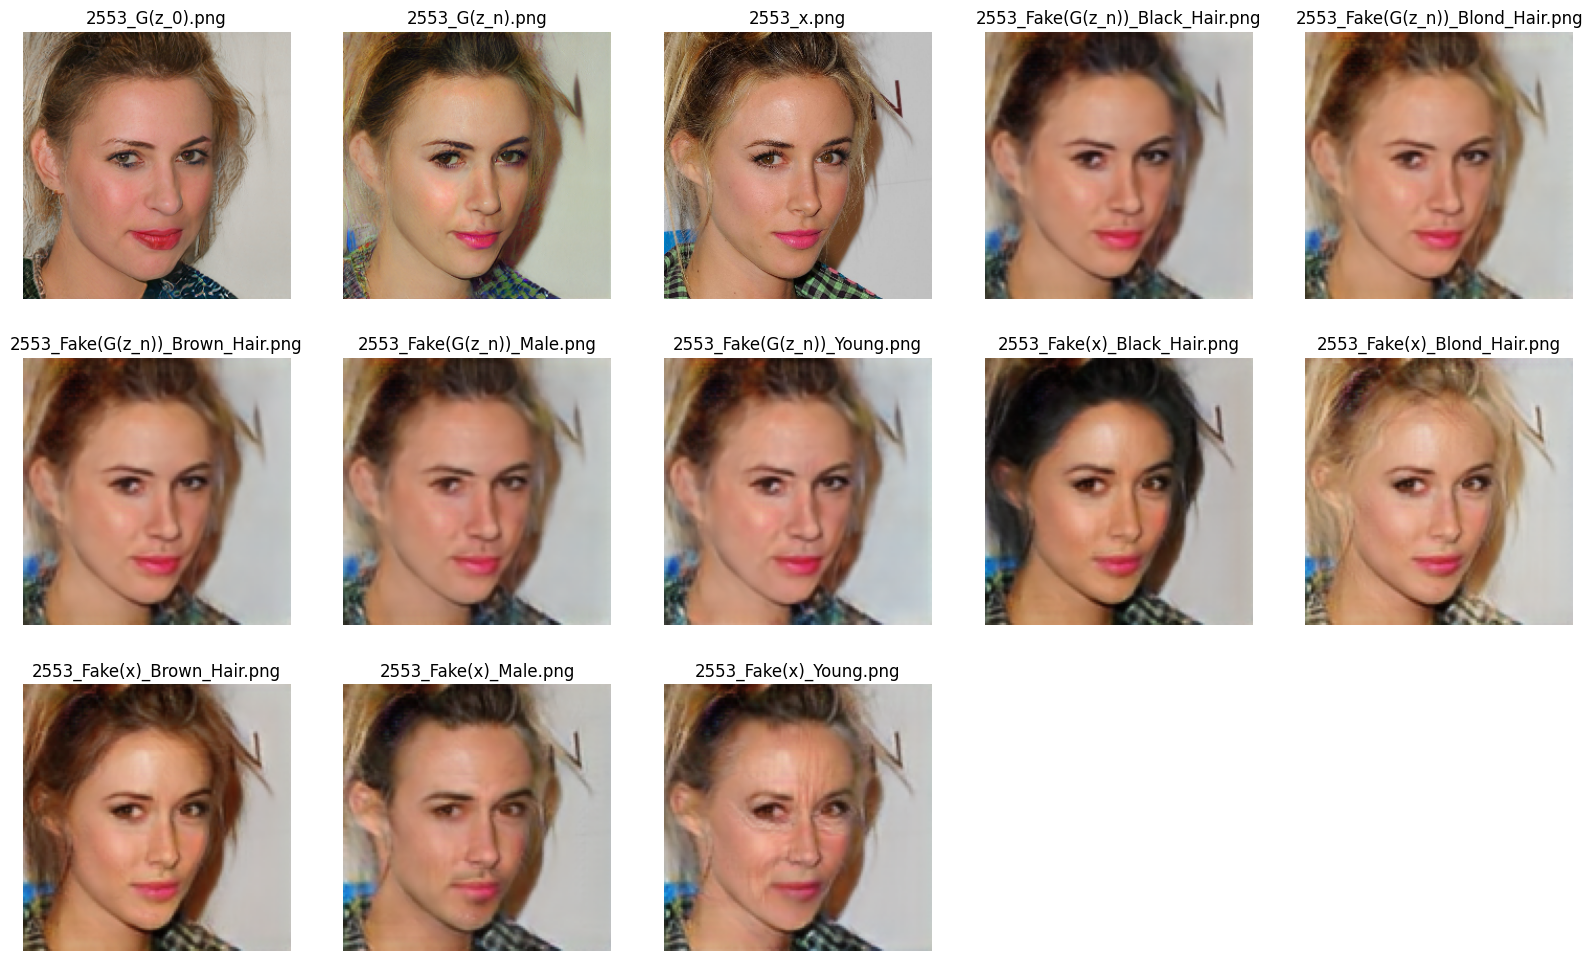

In [10]:
# origin code
show_imgs(2553)